In [114]:
# KNN Example: Classifying Multi-Feature Points 🧬

# -----------------------------------------------
# Step 0: Import required libraries
# -----------------------------------------------

import numpy as np  # For creating and manipulating arrays
import matplotlib.pyplot as plt  # For plotting visualizations
from sklearn.model_selection import train_test_split  # To split data into training/testing
from knn import KNNClassifier  # Import our custom KNN model

In [115]:
# -----------------------------------------------
# Step 1: Generate synthetic data for 4 classes
# -----------------------------------------------

np.random.seed(42)  
# np.random.seed() sets the random number generator's seed.
# Setting a seed ensures the random numbers are the same each time you run the code.
# This helps with reproducibility of results.

n_samples = 300  
# Number of data points (samples) per class.

n_features = 2  
# Total number of features (dimensions) each sample has.

# Define a helper function to generate data for each class
def generate_class(center_xy, label):
    """
    Generate samples for one class with 2 features.
    - center_xy: The mean (center) of the first two features for this class (used for plotting)
    - label: The integer label (class ID) for this class
    
    Returns:
    - X_class: A numpy array of shape (n_samples, 4) with feature data
    - y_class: A numpy array of shape (n_samples,) filled with the class label
    """

    # np.random.randn(n_samples, 2) generates a (n_samples x 2) array with values
    # drawn from a standard normal distribution (mean=0, std=1).
    # Adding center_xy shifts the data to be centered around that point.
    X_class = np.random.randn(n_samples, 2) + np.array(center_xy)

    # np.full creates an array filled with the class label repeated n_samples times
    y_class = np.full((n_samples,), label)  

    return X_class, y_class

# Generate 4 classes of data with different centers for clustering
X0, y0 = generate_class([0, 0], 0) 
X1, y1 = generate_class([0, 4], 1) 
X2, y2 = generate_class([4, 0], 2) 
X3, y3 = generate_class([4, 4], 3) 

# np.vstack stacks arrays vertically (row-wise)
# This combines all class data into one big dataset with shape (400, 4)
X = np.vstack((X0, X1, X2, X3))   

# np.hstack concatenates all labels into one 1D array of length 400
y = np.hstack((y0, y1, y2, y3))  

In [116]:
# -----------------------------------------------
# Step 2: Split data into training and testing sets
# -----------------------------------------------

# train_test_split shuffles and splits data into train/test subsets.
# test_size=0.2 means 20% of data for testing, 80% for training.
# random_state=1 ensures this split is the same every time you run it.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)


In [117]:
# -----------------------------------------------
# Step 3: Create and train the KNN model
# -----------------------------------------------

# Instantiate KNNClassifier with k=5 (number of neighbors to consider)
model = KNNClassifier(n_neighbors=5)

# Train the model by "memorizing" the training data
# KNN doesn't actually learn parameters but stores data for prediction
model.train(X_train, y_train)

In [118]:
# -----------------------------------------------
# Step 4: Evaluate the model accuracy on test data
# -----------------------------------------------

# model.score compares predicted vs true labels and returns accuracy (fraction correct)
accuracy = model.score(X_test, y_test)
print(f"✅ Accuracy with 4 classes: {accuracy:.2f}")

✅ Accuracy with 4 classes: 0.93


In [119]:
# -----------------------------------------------
# Step 5: Predict classes for new, unseen points
# -----------------------------------------------

# New samples with 4 features each (same shape as training samples)
new_points = np.array([
    [0.0,1.1],
    [2.2,3.3],
    [4.4,0.5],
    [1.6,2.7],
    [3.8,4.9],
    [3.0,2.1],
    [1.2,0.3],
    [4.4,3.5],
    [2.6,1.7],
    [2.8,2.9],
])


# Predict labels for new_points using the trained model
predictions = model.predict(new_points)

print("🔍 Predictions for new points:", predictions)

🔍 Predictions for new points: [0 3 2 1 3 2 0 3 2 3]


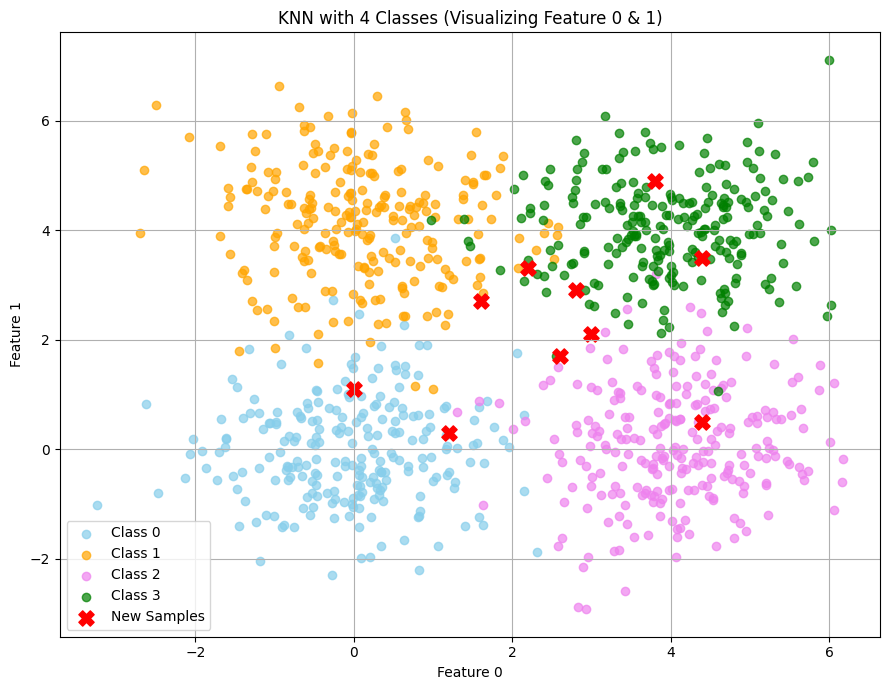

In [120]:
# -----------------------------------------------
# Step 6: Visualize the data and new points (using first two features)
# -----------------------------------------------

plt.figure(figsize=(9, 7))  # Set plot size width=9 inch, height=7 inch

# Define colors for each class for consistent plotting
colors = ['skyblue', 'orange', 'violet', 'green']
labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# Loop over each class index i in range(4)
for i in range(4):
    # Plot training points belonging to class i
    # Select rows where y_train == i, then plot columns 0 and 1 (features)
    plt.scatter(
        X_train[y_train == i][:, 0],  # X-coordinates (feature 0)
        X_train[y_train == i][:, 1],  # Y-coordinates (feature 1)
        color=colors[i],               # Color corresponding to class
        label=labels[i],              # Label for legend
        alpha=0.7                     # Transparency for overlapping points
    )

# Plot new points as red X markers, bigger size for visibility
plt.scatter(
    new_points[:, 0],  # feature 0 for new points
    new_points[:, 1],  # feature 1 for new points
    color='red',       # red color to stand out
    marker='X',        # X shape marker
    s=120,             # marker size
    label='New Samples' # legend label
)

# Set the plot title and axis labels
plt.title("KNN with 4 Classes (Visualizing Feature 0 & 1)")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.legend()  # Show legend on the plot
plt.grid(True)  # Add grid lines for easier visualization
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()  # Display the plot window